(0.4, 1.0)

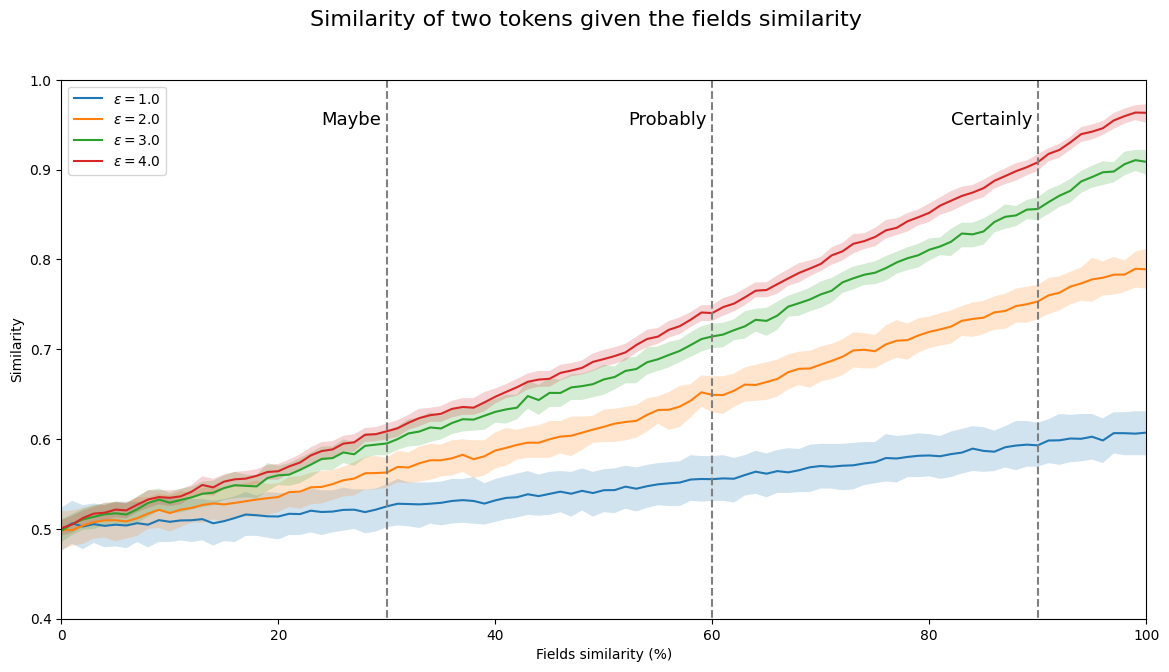

In [18]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../")

from linkage import linker
from tokenizer import tokenizer

# Parameters
N = 20
REFERENCE_FIELDS = ["a"*i for i in range(1, 100)]
PERCENTS = np.arange(0, 101)

THRESHOLDS = {
    "CERTAINLY": 90,
    "PROBABLY": 60,
    "MAYBE": 30,
}

# Configure plot
fig, ax = plt.subplots(1, 1, sharey=False, sharex=True, figsize=(14, 7))
fig.suptitle(f"Similarity of two tokens given the fields similarity", fontsize=16)

# Plot for each epsilon
for row, eps in enumerate([1.0, 2.0, 3.0, 4.0]):
    # Generate reference and target tokens with given percentage similarity
    reference_tokens = [tokenizer.tokenize(REFERENCE_FIELDS, eps=eps) for _ in range(N)]
    
    def target_fields(p):
        return [f if i < p else f + "x" for i, f in enumerate(REFERENCE_FIELDS)]
    
    all_target_tokens = [[tokenizer.tokenize(target_fields(p), eps=eps) for _ in range(N)] for p in PERCENTS]

    # Compute similarity for each pair of tokens and store the mean, low and high
    p5s, means, p95s = [], [], []
    for target_tokens in all_target_tokens:
        similarities = [linker.similarity(a, b) for a in reference_tokens for b in target_tokens]
        means.append(np.mean(similarities))
        p5s.append(np.percentile(similarities, 5))
        p95s.append(np.percentile(similarities, 95))

    # Plot line and fill between
    ax.plot(PERCENTS, means, label=f"$\\epsilon={eps}$")
    ax.fill_between(PERCENTS, p5s, p95s, alpha=0.2)

# Threshold vertical lines
for name, x in THRESHOLDS.items():
    ax.vlines(x=x, ymin=0, ymax=1, color="gray", linestyle="dashed")
    ax.text(x-0.5, 0.95, name.title(), fontsize=13, ha="right")

# Legend, labels and limits
ax.legend()
ax.set_xlabel("Fields similarity (%)")
ax.set_ylabel("Similarity")
ax.set_xlim(0, 100)
ax.set_ylim(0.4, 1)
pass

In [ ]:
# TODO: find pairs of names that fall into each bucket of the threshold